<a href="https://colab.research.google.com/github/piyush1856/neural-network/blob/main/_3N_1_Backpropagation_%26_Code_Wrapped_In_Class_%26_NN_Using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")

# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 35.0MB/s]


In [ ]:
# initialize parameters randomly
d = 2 # diensionality / number of inputs
n = 3 # Number of classes (A/B/C) / Number of neurons in output layer
h = 4 # neurons in hidden layer

## Forward Propogation

In [ ]:
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

In [ ]:
Z1 = np.dot(X, W1) + b1 # (300,2) x (2,4) + (1,4) => (300,4)
A1 = np.maximum(0, Z1) # ReLU if Z1 < 0 A1 =0 else A1 = Z1

In [ ]:
Z2 = np.dot(A1, W2) + b2  # (300, 4) x (4, 3) + (1, 3) => (300, 3)
# Applying softmax function to get A2
Z2_exp = np.exp(Z2)
A2 = Z2_exp/np.sum(Z2_exp, axis=1, keepdims=True)
probs = A2

## Back Propogation

In [ ]:
# Number of training examples
m = y.shape[0] # 300 datapoints

In [ ]:
dZ2 = probs
dZ2[range(m),y] -= 1

In [ ]:
# shape A1 => (300,4)  shape dZ2 (equal to probability)=> (300,3)
dW2 = np.dot(A1.T, dZ2)/m # shape => (4, 300) x (300, 3) => (4,3)

In [ ]:
db2 = np.sum(dZ2, axis=0, keepdims=True)/m # shape (1 ,3)

In [ ]:
dA1 = np.dot(dZ2, W2.T) # (300,3) x (3 , 4) => (300, 4)

In [ ]:
dA1[Z1 <= 0] = 0 # was dA1[A1 <= 0] = 0. changed it to dA1[Z1 <= 0] = 0
dZ1 = dA1 # same shape as dA1 (300, 4)

In [ ]:
dW1 = np.dot(X.T, dZ1)/m # (2, 300) x (300 ,4) => (2, 4)
db1 = np.sum(dZ1, axis=0, keepdims=True)/m

In [ ]:
lr = 1e-0

In [ ]:
# perform a parameter update
W1 += -lr * dW1
b1 += -lr * db1
W2 += -lr * dW2
b2 += -lr * db2

## Done! Let's put everything together.

In [ ]:
# initialize parameters randomly
d = 2
h = 100 # size of hidden layer
n = 3
W1 = 0.01 * np.random.randn(d,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,n)
b2 = np.zeros((1,n))

# some hyperparameters
lr = 1e-0
reg = 1e-3 # regularization strength
num_examples = X.shape[0]

for i in range(10000):

    # forward prop
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(A1, W2) + b2
    Z2 = np.exp(Z2)
    A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
    probs = A2

    # calc. loss
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2) # regularization
    loss = data_loss + reg_loss # adding reg. to loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # backprop
    # compute the gradient on scores
    dZ2 = probs
    dZ2[range(num_examples),y] -= 1
    dZ2 /= num_examples

    # first backprop into parameters W2 and b2
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    # next backprop into hidden layer, A1
    dA1 = np.dot(dZ2, W2.T)
    # backprop the ReLU non-linearity
    dA1[Z1 <= 0] = 0
    # finally into W,b
    dZ1 = dA1
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW1 += reg * W1

    # perform a parameter update
    W1 += -lr * dW1
    b1 += -lr * db1
    W2 += -lr * dW2
    b2 += -lr * db2

iteration 0: loss 1.098666
iteration 1000: loss 0.338304
iteration 2000: loss 0.257232
iteration 3000: loss 0.249446
iteration 4000: loss 0.248474
iteration 5000: loss 0.248098
iteration 6000: loss 0.247844
iteration 7000: loss 0.247687
iteration 8000: loss 0.247543
iteration 9000: loss 0.247463


## NN class - all code wrapped as class

In [ ]:
class NN:

    def __init__(self, n_features, n_hidden, n_classes):
        self.d = n_features
        self.h = n_hidden
        self.n = n_classes
        self.W1 = 0.01 * np.random.randn(self.d, self.h)
        self.b1 = np.zeros((1,self.h))
        self.W2 = 0.01 * np.random.randn(self.h,self.n)
        self.b2 = np.zeros((1,self.n))

    def fwd_prop(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        Z2 = np.exp(Z2)
        A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
        return A1, A2

    def cce_loss(self, y, probs):
        num_examples = y.shape[0]
        correct_logprobs = -np.log(probs[range(num_examples),y])
        loss = np.sum(correct_logprobs)/num_examples
        return loss

    def back_prop(self, X, A1, A2, y):
        # compute the gradient on scores
        num_examples = y.shape[0]
        dZ2 = A2
        dZ2[range(num_examples),y] -= 1
        dZ2 /= num_examples
        # first backprop into parameters W2 and b2
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        # next backprop into hidden layer, A1
        dA1 = np.dot(dZ2, self.W2.T)
        # backprop the ReLU non-linearity
        dA1[A1 <= 0] = 0
        # finally into W,b
        dZ1 = dA1
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        return dW1, db1, dW2, db2

    def fit(self, X, lr, reg, max_iters):
        num_examples = X.shape[0]
        for i in range(max_iters):
            #foward prop
            A1, A2 = self.fwd_prop(X)
            # calculate loss
            data_loss = self.cce_loss(y, A2)
            reg_loss = 0.5*reg*np.sum(self.W1*self.W1) + 0.5*reg*np.sum(self.W2*self.W2)
            loss = data_loss + reg_loss

            if i % 1000 == 0:
                print("iteration %d: loss %f" % (i, loss))

            dW1, db1, dW2, db2  = self.back_prop(X, A1, A2, y)

            # add regularization gradient contribution
            dW2 += reg * self.W2
            dW1 += reg * self.W1

            # perform a parameter update
            self.W1 += -lr * dW1
            self.b1 += -lr * db1
            self.W2 += -lr * dW2
            self.b2 += -lr * db2

    def predict(self, X):
        A1 = np.maximum(0, np.dot(X, self.W1) + self.b1) # ReLU(Z1) = ReLU(W1T. X + b1)
        Z2 = np.dot(A1, self.W2) + self.b2 # Z2 = W2T.A1 + b2 => 3 probab
        y_hat = np.argmax(Z2, axis=1) # taking index of max probab
        return y_hat

nn_model = NN(n_features=2, n_hidden=100, n_classes=3)
nn_model.fit(X, lr=1, reg=1e-3, max_iters=10000)
print('training accuracy: %.2f' % (np.mean(nn_model.predict(X) == y)))

iteration 0: loss 1.098629
iteration 1000: loss 0.307344
iteration 2000: loss 0.264820
iteration 3000: loss 0.255039
iteration 4000: loss 0.251941
iteration 5000: loss 0.250763
iteration 6000: loss 0.249985
iteration 7000: loss 0.249540
iteration 8000: loss 0.249281
iteration 9000: loss 0.249105
training accuracy: 0.99


In [ ]:
from matplotlib import pyplot as plt

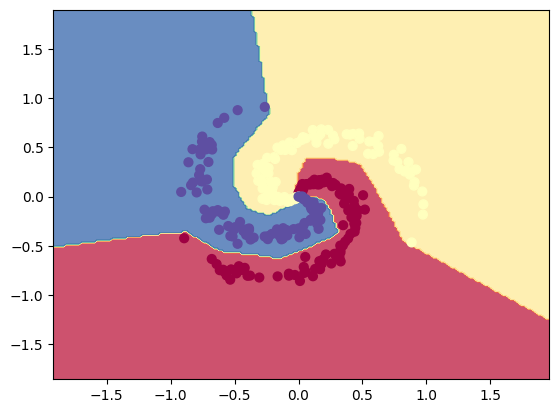

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid

y_hat = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Training a NN using sklearn - Multi layer perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs',
                    alpha=1e-5,
                    hidden_layer_sizes=(100),
                    random_state=100,
                    activation='relu',
                    max_iter=200)
mlp.fit(X, y)
print(mlp.score(X, y))

0.9933333333333333


In [ ]:
len(mlp.coefs_)

2

In [ ]:
len(mlp.intercepts_)

2

In [ ]:
mlp.loss_

np.float64(0.014019549678176087)

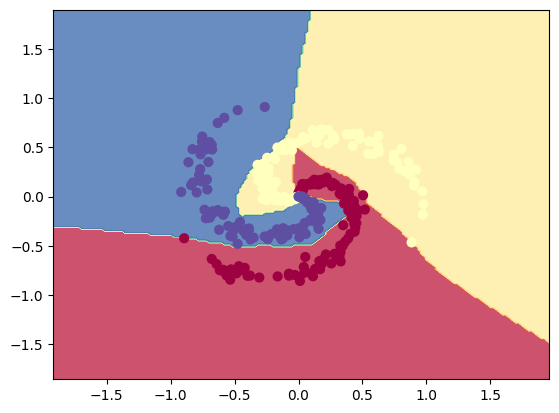

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
# predict for all the points in the grid
y_hat = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()